# Apache Spark

Apache Spark – это открытая распределённая вычислительная платформа для обработки больших данных. Он разработан для быстрого анализа данных, используя возможности распределённых вычислений и хранения данных в оперативной памяти. В этой части мы подробно рассмотрим историю Spark, его архитектуру и ключевые концепции, лежащие в его основе.

## Что такое Apache Spark?

Apache Spark – это платформа, которая позволяет разработчикам и аналитикам эффективно обрабатывать большие объемы данных. Он предлагает высокоуровневые API на различных языках (Scala, Python, Java, R) и хорошо интегрируется с экосистемой Hadoop, но при этом превосходит традиционные модели, такие как MapReduce, благодаря хранению промежуточных данных в памяти и оптимизированному выполнению вычислений.

## Основные идеи

- Распределенная модель вычислений по логике DAG (Directed Acyclic Graph, направленный ациклический граф).
- "Ленивая" модель вычислений.
- Продвинутые механизмы управления памятью:
  + предпочтительно хранение данных в оперативной памяти,
  + сброс данных на диск при нехватки оперативной памяти,
  + гибкое кэширование данных,
  + различные форматы сериализации данных.
- API для Scala, Java, Python, R,
  + в последние годы Apache Spark стремится быть python-first
- Единый API для пакетной и онлайн-обработки

## Немного истории

- **Начало разработки (2009–2010):** Разработан в рамках проекта в UC Berkeley AMP Lab с целью создания системы, способной выполнять вычисления быстрее традиционных моделей MapReduce. Акцент делался на обработку данных в памяти.
- **2010–2012:** Spark становится объектом активного исследования, благодаря публикациям и экспериментальным результатам его значительно более высокой производительности.
- **2014:** Проект поступает в инкубатор Apache Software Foundation и быстро превращается в один из ключевых инструментов для анализа больших данных.

## Архитектура Apache Spark

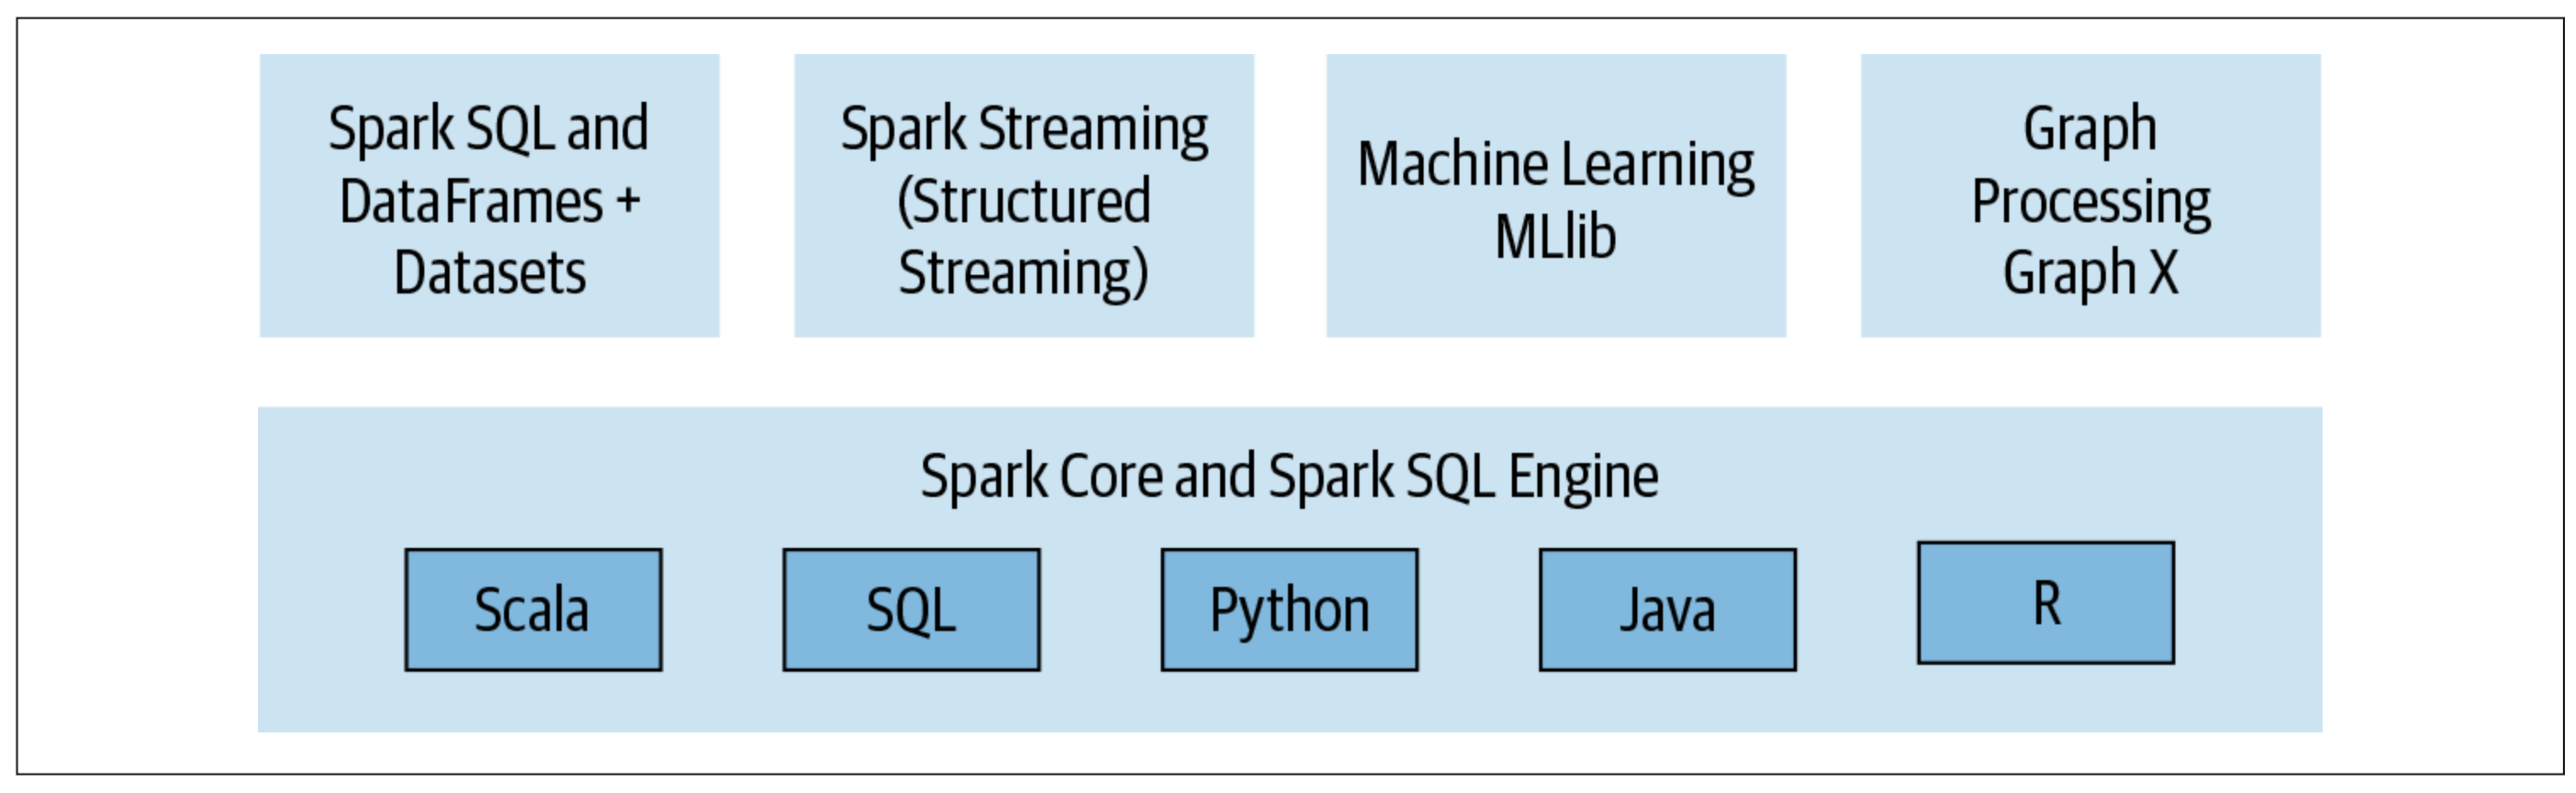

### Основные компоненты:

#### Spark Core:

- Ядро платформы,
- Движок для параллельной распределенной обработки,
- Запускает и отслеживает статусы заданий,
- Управляет сериализацией и кэшированием,
- Выполняет восстановление задач после сбоев,
- Координирует выполнение задач (tasks).

#### Spark SQL:

- Отвечает за работу со структурированными данными,
- Дает возможность работать с данными из различных источников в единой модели,
- Обеспечивает ряд API:
    + Dataframe API,
    + Dataframe DSL,
    + Spark SQL;
- API работает на уровнях
    + Языка,
    + RDD/DataFrame,
    + DataSource (Json, ORC, Parquet etc.).


#### Spark Streaming:

- Отвечает за работу с потоковыми данными,
- Не является честным стримингом, работает через микро-пакеты,
- Может комбинировать потовые данные со статическими,
- Работает через унифицированный API.

#### Spark MLLib:

- Отвечает за работу с machine learning,
- Поддерживает специализированные библиотеки для линейной алгебры и статистики,
- Использует унифицированный API для создания единых конвейеров обработки,
- Создает собственные конвейеры, ML Pipelines.

#### GraphX:

- Отвечает за работу с графовыми данными,
- Работает на основе Resilient Distributed Graph (RDG),
- Использует алгоритм Pregel (supersteps iterations),
- Использует унифицированный API для работы с графами.

### Принципы работы и взаимодействие компонентов:

#### Driver и Executors:

- *Driver* – это приложение, которое запускается на мастер-ноде. Оно отвечает за планирование выполнения задач, построение DAG (Directed Acyclic Graph) и распределение работы между нодами.
- *Executors* – это процессы, запущенные на рабочих нодах, которые фактически выполняют вычислительные задачи. Driver направляет задачи к Executors, собирает результаты, и управляет вычислительными ресурсами.

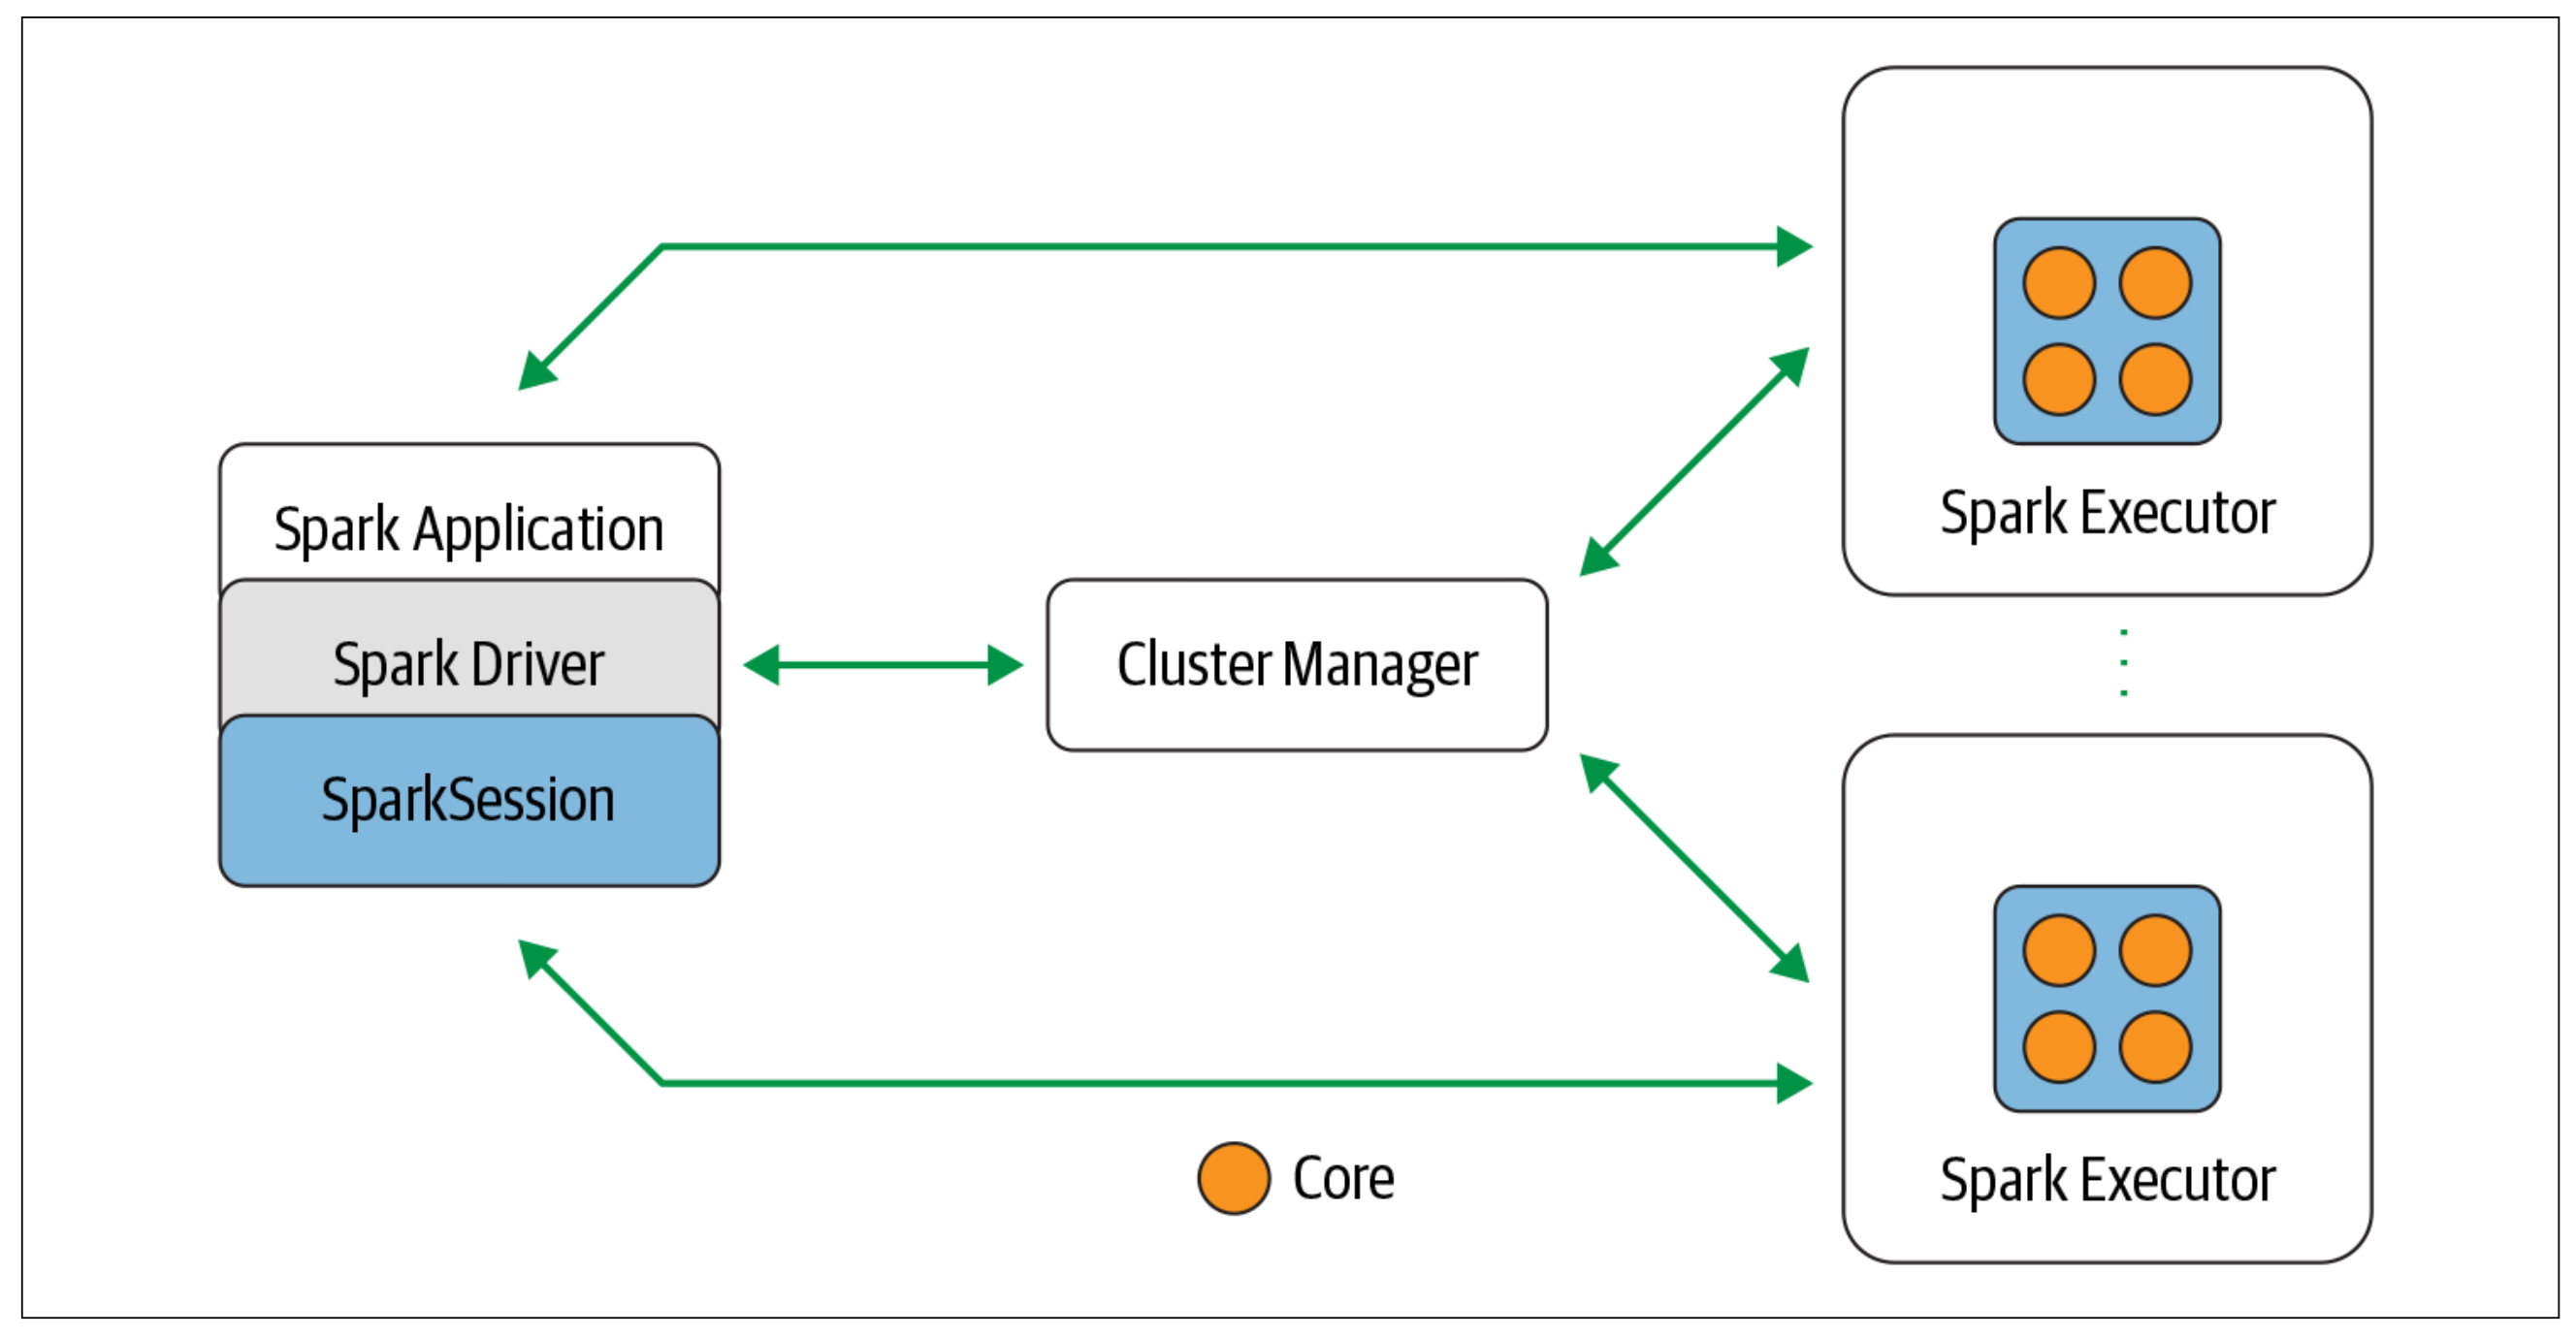

#### Cluster Manager:

Spark может работать в различных режимах распределения задач. Существуют разные типы менеджеров кластеров:
  - **Standalone:** Встроенный менеджер кластера, который подходит для небольших кластеров и тестовых сред.
  - **YARN:** Менеджер ресурсов из Hadoop, позволяющий интегрировать Spark в экосистему Hadoop.
  - **Mesos:** Распределённая система управления ресурсами, которая может эффективно делить ресурсы между многочисленными приложениями.
  - **Kubernetes:** Современная платформа для оркестрации контейнеров, позволяющая развернуть Spark в облачных средах и управлять распределёнными задачами посредством контейнеризации.

## Основные концепции Spark

### RDD (Resilient Distributed Dataset):

- Основная абстракция Apache Spark – неизменяемая коллекция объектов, распределённых по кластеру.
- Позволяет выполнять два типа операций:
  - **Трансформации (Transformations):** операции, которые преобразуют один RDD в другой (например, `map`, `filter`, `flatMap`).
  - **Действия (Actions):** операции, которые возвращают результат вычислений (например, `collect`, `count`, `take`).
-  Поддерждивает разные способы кэширования данных (в памяти, на диске, в разных комбинациях, внешнее).

### DataFrames и DataSets:

- **DataFrame:** оптимизированная структура данных, аналогичная таблице в реляционных базах данных. DataFrame предоставляет возможность выполнять SQL-запросы, агрегирование и другие операции с данными с высокой оптимизацией.
- **DataSet:** расширение DataFrame для работы с типизированными объектами (доступно на Scala и Java), объединяя преимущества RDD и DataFrame.

### Lazy Evaluation (Ленивая оценка) и DAG Scheduler:

- **Lazy Evaluation:** Spark не вычисляет результаты трансформаций немедленно. Вместо этого строится план выполнения (DAG), который оптимизируется перед запуском задач, что позволяет минимизировать количество операций и эффективно использовать вычислительные ресурсы.
- **DAG (Directed Acyclic Graph) Scheduler:** Планирует выполнение вычислительных задач, построенный на основании зависимостей между операциями. После оптимизации DAG Scheduler распределяет вычисления по Executors, обеспечивая высокую эффективность выполнения.

# Давайте попробуем сами!

Возможно, вам нужно установить Java 11

In [1]:
!echo $JAVA_HOME

In [2]:
!which java

/usr/bin/java


In [3]:
!readlink -f /usr/bin/java

/usr/lib/jvm/java-11-openjdk-amd64/bin/java


In [4]:
import os
JAVA_HOME = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["JAVA_HOME"]= JAVA_HOME

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder \
    .appName("my_spark") \
    .master("local[*]") \
    .getOrCreate()

25/06/23 22:28:13 WARN Utils: Your hostname, WIN-OJRP7VQVTV0 resolves to a loopback address: 127.0.1.1; using 172.23.12.48 instead (on interface eth0)
25/06/23 22:28:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/23 22:28:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
spark

### Напомним, что такое RDD

Resilient Distributed Dataset, основа основ Apache Spark, низкоуровненая базовая абстракция, в которую превратится ваш код на DataFrame API

Из чего состоит RDD
* Dependencies
* Partitions
* Functions
* (если определен) Partitioner
* (если определен) Locations

### Зачем использовать RDD?
* Нужен функционал, которого не оказалось в датафреймах 
* У вас есть старая кодовая база с RDD
* Вам нужен контроль за данными и за распределенными переменными
* Вы хотите добиться высокой производительности (**не в Python!**)

In [8]:
sc = spark.sparkContext

In [9]:
!curl -fSL https://www.gutenberg.org/ebooks/11.txt.utf-8 -o alice.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   298  100   298    0     0    382      0 --:--:-- --:--:-- --:--:--   382
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  170k  100  170k    0     0  63268      0  0:00:02  0:00:02 --:--:--  109k


In [10]:
!head -n 20 alice.txt

﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release date: June 27, 2008 [eBook #11]
                Most recently updated: June 3, 2025

Language: English

Credits: Arthur DiBianca and David Widger


In [11]:
alice_rdd = sc.textFile("alice.txt")

In [12]:
alice_rdd.first()

"The Project Gutenberg eBook of Alice's Adventures in Wonderland"

In [13]:
words_rdd = (
    alice_rdd
    .map(lambda x: x.lower().split('\n'))
    .map(lambda content: content[0].split())
)

In [14]:
words_rdd.take(5)

[['the',
  'project',
  'gutenberg',
  'ebook',
  'of',
  "alice's",
  'adventures',
  'in',
  'wonderland'],
 [],
 ['this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'in',
  'the',
  'united',
  'states',
  'and'],
 ['most',
  'other',
  'parts',
  'of',
  'the',
  'world',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions'],
 ['whatsoever.',
  'you',
  'may',
  'copy',
  'it,',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms']]

In [20]:
words_rdd = (
    alice_rdd
    .map(lambda x: x.lower().split('\n'))
    .flatMap(lambda content: content[0].split())
)

In [21]:
words_rdd.take(100)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 "alice's",
 'adventures',
 'in',
 'wonderland',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever.',
 'you',
 'may',
 'copy',
 'it,',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www.gutenberg.org.',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states,',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook.',
 'title:',
 "alice's",
 'adventures',
 'in',
 'wonderland',
 'author:',
 'lewis',
 'carroll',
 'release']

In [22]:
word_count_rdd = (
    words_rdd
    .map(lambda x: (x,1))
    .reduceByKey(lambda x, y: x + y)
)

In [23]:
words_rdd.map(lambda x: (x,1)).take(5)

[('the', 1), ('project', 1), ('gutenberg', 1), ('ebook', 1), ('of', 1)]

In [24]:
word_count_rdd.take(10)

[('of', 616),
 ("alice's", 4),
 ('this', 146),
 ('for', 161),
 ('use', 28),
 ('anyone', 4),
 ('united', 15),
 ('states', 11),
 ('and', 833),
 ('most', 14)]

In [25]:
word_count_rdd.takeOrdered(10, key=lambda x: -x[1])

[('the', 1798),
 ('and', 833),
 ('to', 784),
 ('a', 675),
 ('of', 616),
 ('she', 518),
 ('said', 420),
 ('in', 415),
 ('it', 374),
 ('you', 330)]

In [26]:
word_count_rdd.filter(lambda x: len(x[0]) > 4).takeOrdered(10, key=lambda x: -x[1])

[('alice', 221),
 ('little', 120),
 ('about', 92),
 ('project', 83),
 ('alice,', 76),
 ('would', 71),
 ('there', 65),
 ('could', 64),
 ('thought', 63),
 ('gutenberg™', 54)]

In [27]:
word_count_rdd.map(lambda x: x[1]).sum()

29564

In [29]:
word_count_rdd.saveAsTextFile("alice_dataset")

Py4JJavaError: An error occurred while calling o151.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/mnt/f/Soft/Work/Workspace/Hadoop_image/hadoop_full/docker-spark/share/alice_dataset already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1623)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1623)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1609)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1609)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:563)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


## Этапы, широкие и узкие трансформации

### Работа по этапам
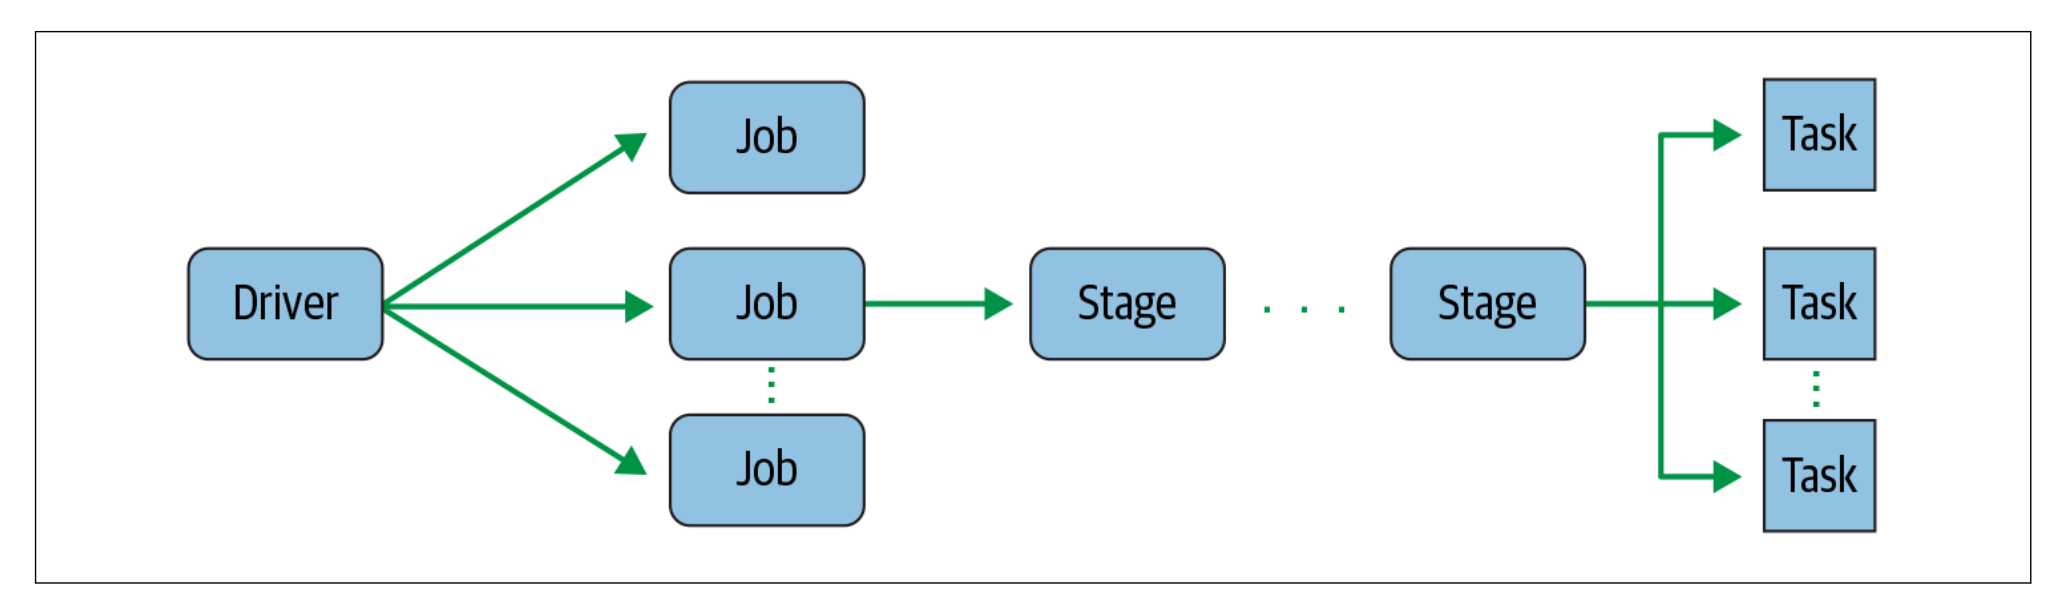

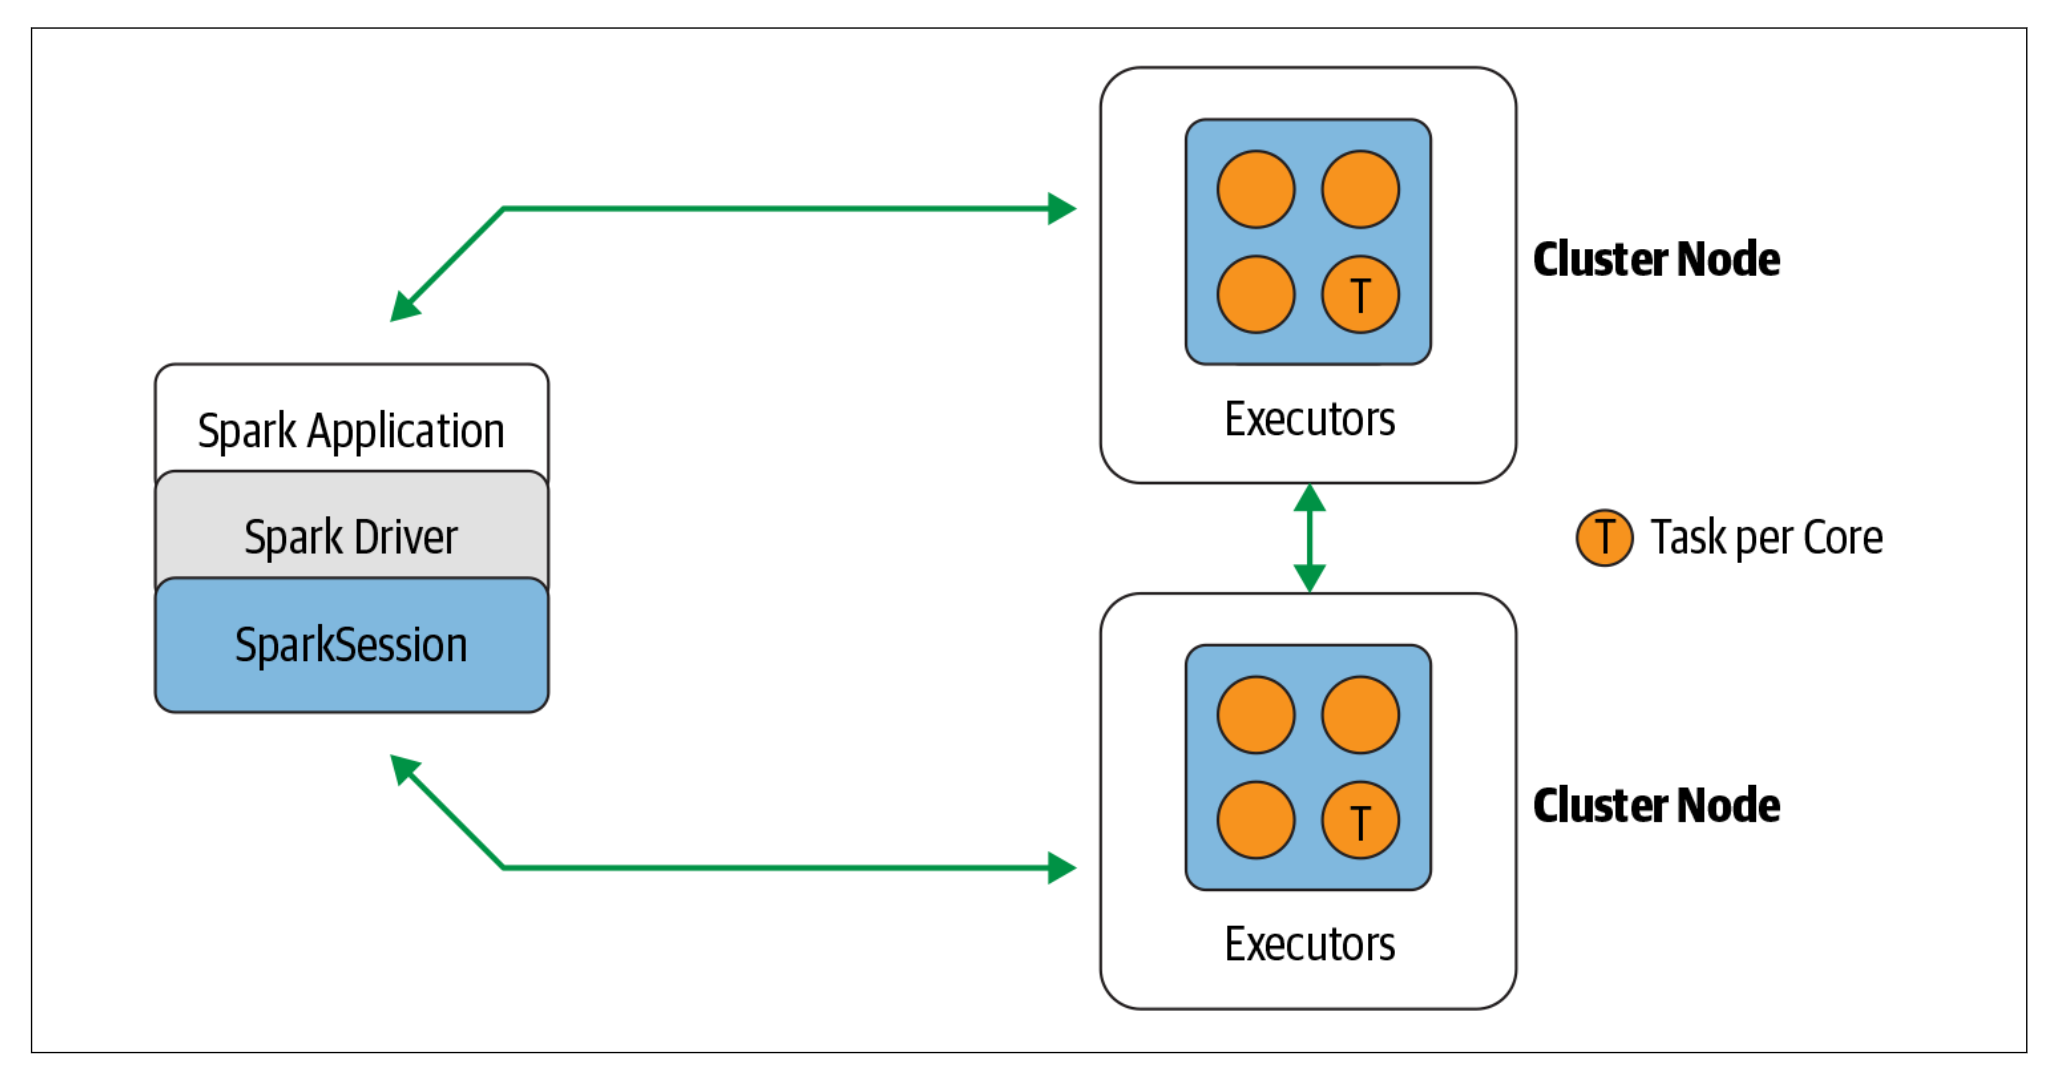

### Широкие и узкие трансформации
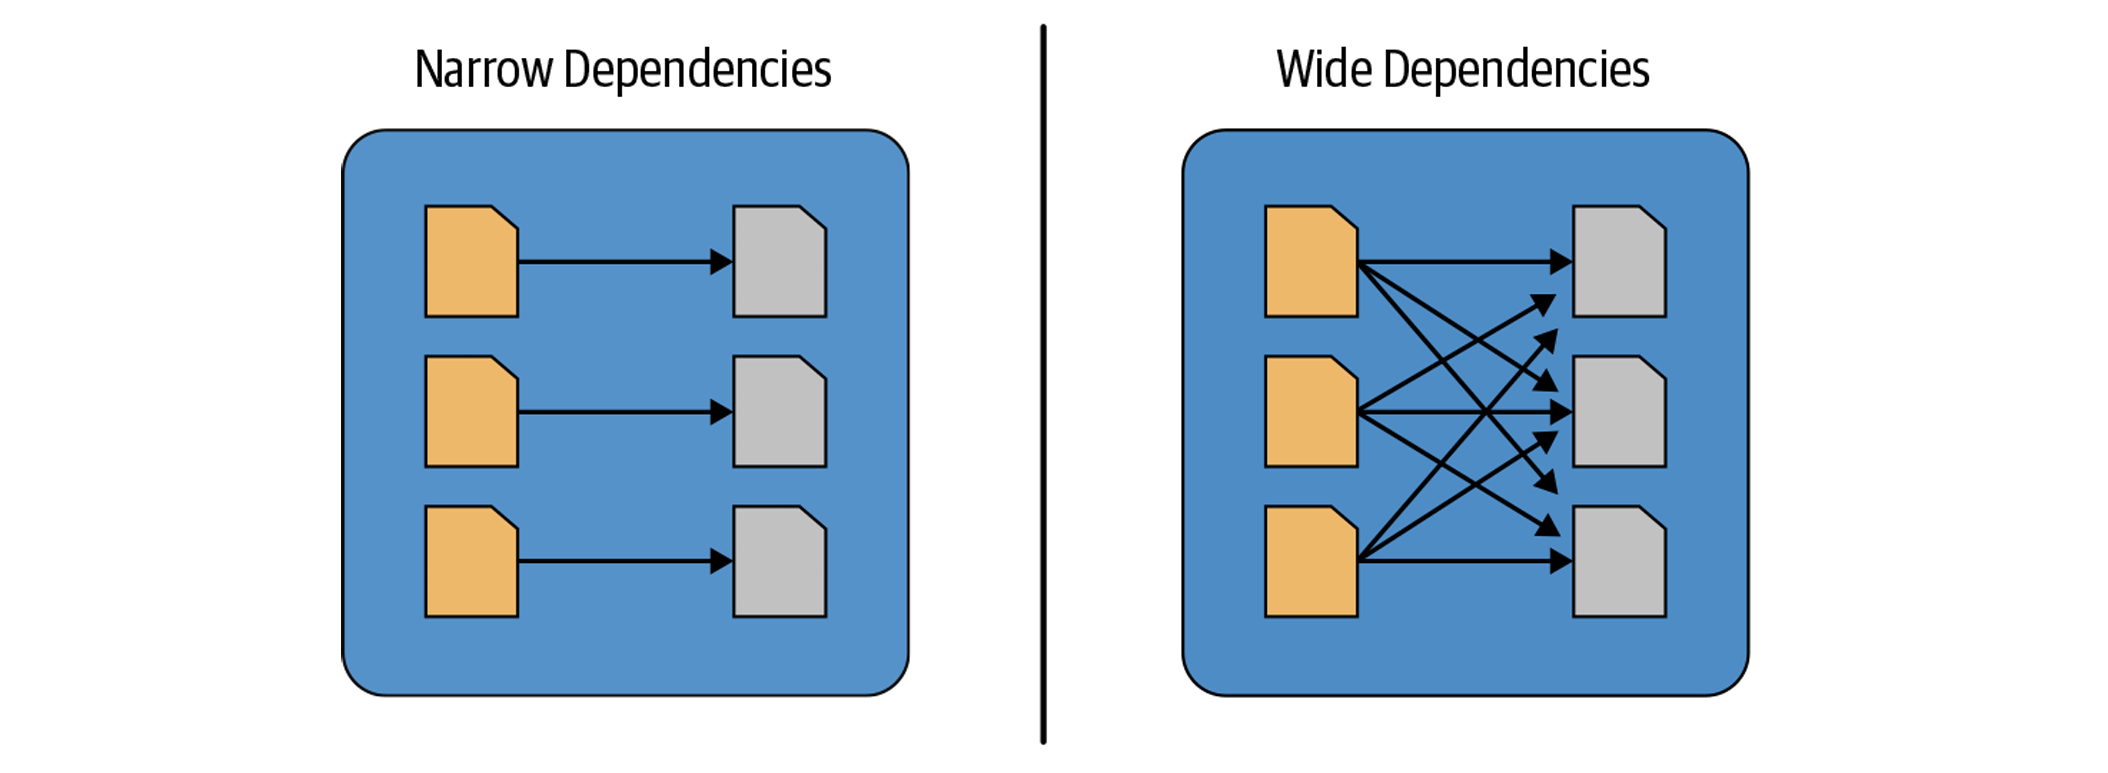

### Ленивый спарк
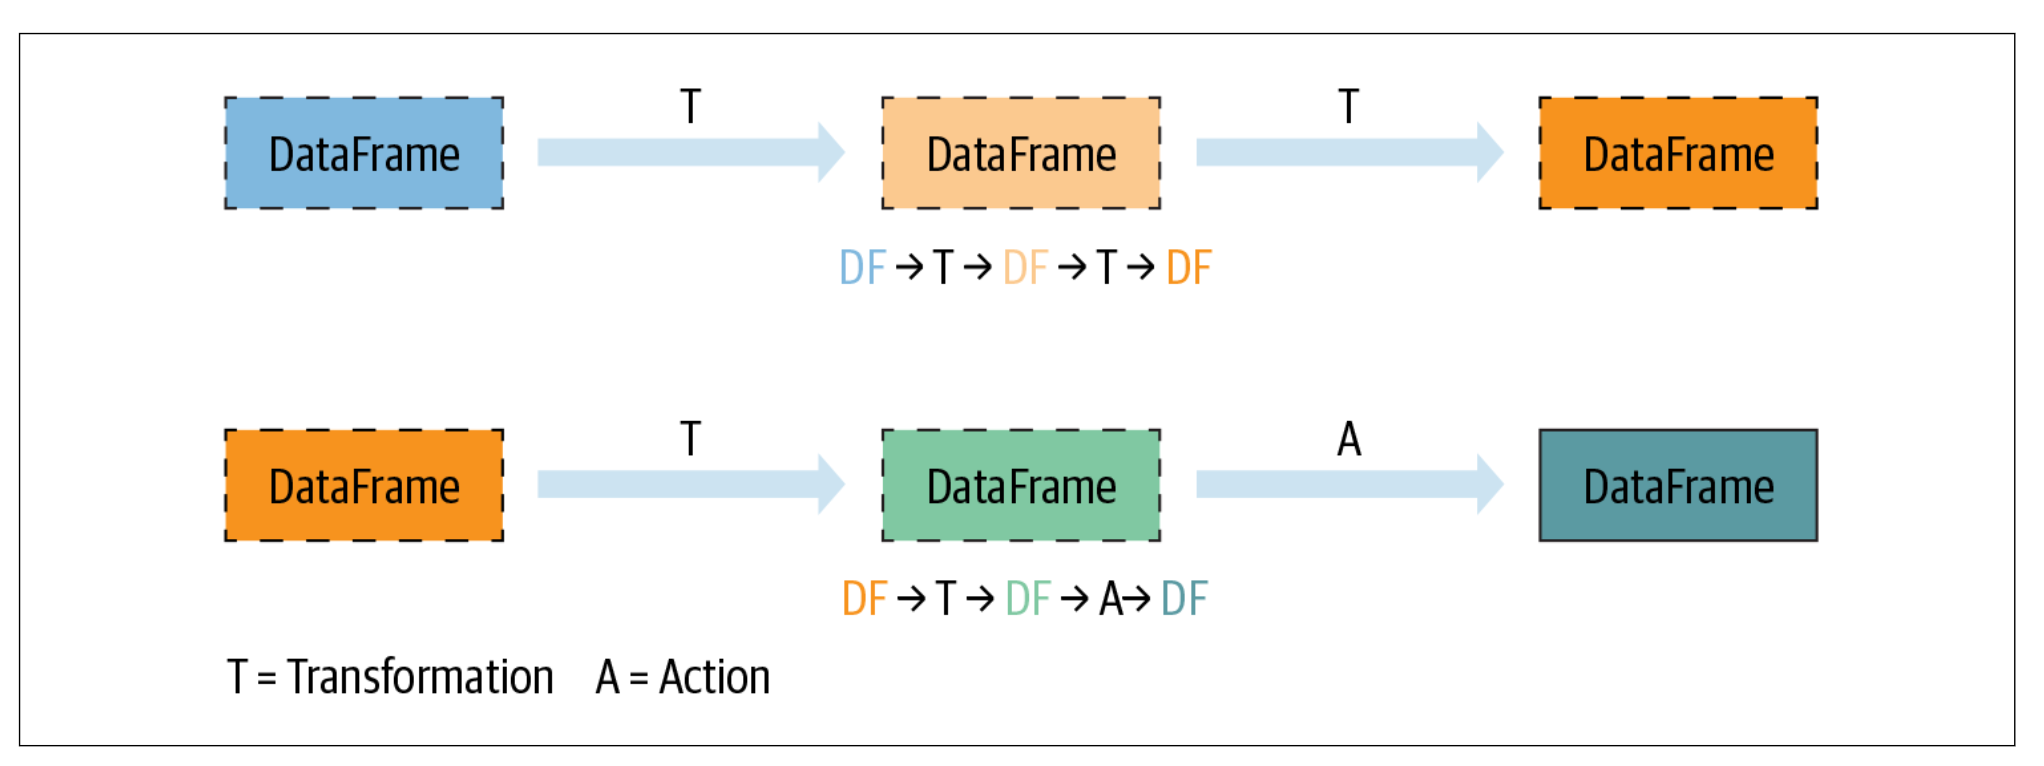


https://spark.apache.org/docs/latest/rdd-programming-guide.html

## Трансформации

In [ ]:
# distinct
words_rdd.distinct().count()

In [ ]:
# filter
def startsWithD(word):
    return word.startswith("d")

In [ ]:
words_rdd.filter(lambda word: startsWithD(word)).take(10)

In [ ]:
# map
words_rdd2 = words_rdd.map(lambda word: (word, word[0], word.startswith("d")))

In [ ]:
words_rdd2.filter(lambda record: record[2]).take(5)

In [ ]:
# flatMap
words_rdd.flatMap(lambda word: list(word)).take(20)

In [ ]:
# sort
words_rdd.sortBy(lambda word: len(word) * -1).take(20)

In [ ]:
# Random Splits

In [ ]:
fiftyFiftySplit = words_rdd.randomSplit([0.5, 0.5])

In [ ]:
fiftyFiftySplit[0].count()

In [ ]:
fiftyFiftySplit[1].count()

#### Actions

In [ ]:
# reduce
spark.sparkContext.parallelize(range(1, 21)).reduce(lambda x, y: x + y)

In [ ]:
# count
words_rdd.count()

In [ ]:
# countApprox
confidence = 0.5
timeoutMilliseconds = 1
words_rdd.countApprox(timeoutMilliseconds, confidence)

In [ ]:
words_rdd.countApprox?

In [ ]:
# countApproxDistinct
words_rdd.countApproxDistinct(0.05)

In [ ]:
words_rdd.countApproxDistinct?

In [ ]:
# countByValue
words_rdd.countByValue()

In [ ]:
# first
words_rdd.first()

In [ ]:
# max and min
spark.sparkContext.parallelize(range(1,20)).max()

In [ ]:
spark.sparkContext.parallelize(range(1,20)).min()

In [ ]:
# take
words_rdd.take(5)

In [ ]:
words_rdd.takeOrdered(5)

In [ ]:
words_rdd.top(10)

In [ ]:
words_rdd.top?

In [ ]:
words_rdd.takeSample(True, 100, 42)

In [ ]:
words_rdd.takeSample?

## Кэширование

In [ ]:
words_rdd.cache()

In [ ]:
words_rdd.getStorageLevel()

In [ ]:
pyspark.storagelevel.StorageLevel?

In [ ]:
words_rdd.getStorageLevel?

In [ ]:
import pyspark

In [ ]:
# сheckpointing
spark.sparkContext.setCheckpointDir("tmp/rdd_checkpoint")

In [ ]:
words_rdd.checkpoint()

In [ ]:
#piping
words_rdd.pipe("wc -l").collect()

In [ ]:
words_rdd.getNumPartitions()

In [ ]:
# mapPartitions
words_rdd.mapPartitions(lambda part: [1]).sum()

In [ ]:
def indexedFunc(partitionIndex, withinPartIterator):
    return ["partition: {} => {}".format(partitionIndex, x) for x in withinPartIterator]
words_rdd.mapPartitionsWithIndex(indexedFunc).collect()

#### Key-Value RDDs
Многие методы подразумевают K-V структуру для выполнения.  
Эта группа выглядит как **"что-то"ByKey**

In [ ]:
# keyBy
keyword = words_rdd.keyBy(lambda word: word.lower()[0])

In [ ]:
keyword.take(5)

In [ ]:
# Mapping over Values
keyword.mapValues(lambda word: word.upper()).collect()

In [ ]:
#flatMap
keyword.flatMapValues(lambda word: word.upper()).collect()

In [ ]:
# Извлекаем K-V
keyword.keys().collect()

In [ ]:
keyword.values().collect()

In [ ]:
# lookup
keyword.lookup("d")

In [ ]:
# sampleByKey
import random
distinctChars = words_rdd.flatMap(lambda word: list(word.lower())).distinct()\
.collect()
sampleMap = dict(map(lambda c: (c, random.random()), distinctChars))
words_rdd.map(lambda word: (word.lower()[0], word))\
.sampleByKey(True, sampleMap, 6).collect()

#### Aggregations

In [ ]:
chars = words_rdd.flatMap(lambda word: word.lower())
KVcharacters = chars.map(lambda letter: (letter, 1))
def maxFunc(left, right):
    return max(left, right)
def addFunc(left, right):
    return left + right
nums = spark.sparkContext.parallelize(range(1,31), 5)

In [ ]:
# countByKey
KVcharacters.countByKey()

In [ ]:
# groupByKey
from functools import reduce
KVcharacters.groupByKey().map(lambda row: (row[0], reduce(addFunc, row[1])))\
.collect()

In [ ]:
# reduceByKey
KVcharacters.reduceByKey(addFunc).collect()

In [ ]:
# aggregate
nums.aggregate(0, maxFunc, addFunc)

In [ ]:
#treeAggregate
depth = 3
nums.treeAggregate(0, maxFunc, addFunc, depth)

In [ ]:
nums.treeAggregate?

In [ ]:
# aggregateByKey
KVcharacters.aggregateByKey(0, addFunc, maxFunc).collect()

In [ ]:
# combineByKey
def valToCombiner(value):
    return [value]
def mergeValuesFunc(vals, valToAppend):
    vals.append(valToAppend)
    return vals
def mergeCombinerFunc(vals1, vals2):
    return vals1 + vals2
outputPartitions = 6
KVcharacters.combineByKey(valToCombiner, mergeValuesFunc, mergeCombinerFunc, outputPartitions)\
.collect()

In [ ]:
# foldByKey
KVcharacters.foldByKey(0, addFunc).collect()

#### Joins

In [ ]:
# joins
distinctChars = words_rdd.flatMap(lambda word: word.lower()).distinct()
keyedChars = distinctChars.map(lambda c: (c, random.random()))
outputPartitions = 10
KVcharacters.join(keyedChars).count()
KVcharacters.join(keyedChars, outputPartitions).count()

## Работа с партициями

In [ ]:
# coalesce
words_rdd.coalesce(1).getNumPartitions()

In [ ]:
# repartition
words_rdd.repartition(10).getNumPartitions()

## Прибираемся

In [ ]:
spark.stop()